## State-Space System Identification Example
This notebook demonstrates state-space system identification using various methods.

In [1]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np

from sippy_unipi import SS_Model, system_identification
from sippy_unipi.datasets import gen_gbn_seq, white_noise_var
from sippy_unipi.ss import lsim_process_form
from sippy_unipi.typing import SSMethods

seed = 0
np.random.seed(seed)

METHOD: list[SSMethods] = [
    "CVA",
    "MOESP",
    "N4SID",
    "PARSIM_K",
    "PARSIM_P",
    "PARSIM_S",
]

### Define System Parameters

In [2]:
# Sample time
ts = 1.0

# SISO SS system (n = 2)
A = np.array([[0.89, 0.0], [0.0, 0.45]])
B = np.array([[0.3], [2.5]])
C = np.array([[0.7, 1.0]])
D = np.array([[0.0]])

tfin = 500
npts = int(tfin // ts) + 1
Time = np.linspace(0, tfin, npts)

### Generate Input Sequence and System Output

In [3]:
# Input sequence
U = np.zeros((1, npts))
[U[0], _, _] = gen_gbn_seq(npts, 0.05)

# Output
x, yout = lsim_process_form(A, B, C, D, U)

# Measurement noise
noise = white_noise_var(npts, [0.15])

# Output with noise
y_tot = yout + noise

### Plot Input and Output

Text(0.5, 0, 'Time')

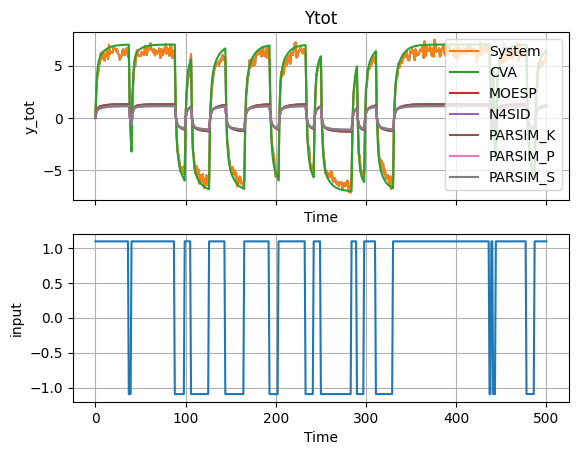

In [4]:
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(Time, y_tot[0])
axs[0].set_ylabel("y_tot")
axs[0].grid()
axs[0].set_xlabel("Time")
axs[0].set_title("Ytot")

legend = ["System"]

axs[0].plot(Time, y_tot[0], label="System")
for method in METHOD:
    sys_id = system_identification(y_tot, U, method, 2, SS_threshold=0.1)
    if not isinstance(sys_id, SS_Model):
        raise ValueError("SS model not returned")
    xid, yid = lsim_process_form(
        sys_id.A, sys_id.B, sys_id.C, sys_id.D, U, sys_id.x0
    )
    axs[0].plot(Time, yid[0], label=method)
axs[0].legend()

axs[1].plot(Time, U[0])
axs[1].set_ylabel("input")
axs[1].grid()
axs[1].set_xlabel("Time")